<a href="https://colab.research.google.com/github/JamesPeralta/NeuroNexus2019/blob/master/NeuroNexus_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Imports

In [37]:
import os
from google.colab import drive
drive.mount('/content/drive')
from PIL import Image
!pip install nipype
from nipype.interfaces.ants import N4BiasFieldCorrection

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Define Helper Functions

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import nibabel as nib


def retrieve_scan(location):
    """
    Retrieves the specified Brain Scan from storage
    :param location: Location of Brain scan along with file name
           Ex)  /Users/jamesperalta/Dev/Test.nii
    :return scan: Brain scan as a numpy array
    """
    scan = nib.load(location)
    scan = np.array(scan.dataobj)
    return scan


def show_slice(image):
    """
    Displays the image passed
    :param image: The image as a numpy array
    """
    plt.imshow(image)
    
    
def show_images(images, cols=1, titles=None):
    """
    Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have the same length as titles.
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()

### Visualizing Data

In [0]:
# CD into the data
t1 = '/content/drive/My Drive/#6_Brain_Segmentation/Scans/JH/JH_T1.nii'
coreg = '/content/drive/My Drive/#6_Brain_Segmentation/Scans/JH/rJH_T2.nii'
c1 = '/content/drive/My Drive/#6_Brain_Segmentation/Scans/JH/c1JH_T1.nii'
c2 = '/content/drive/My Drive/#6_Brain_Segmentation/Scans/JH/c2JH_T1.nii'
c3 = '/content/drive/My Drive/#6_Brain_Segmentation/Scans/JH/c3JH_T1.nii'
c4 = '/content/drive/My Drive/#6_Brain_Segmentation/Scans/JH/c4JH_T1.nii'
c5 = '/content/drive/My Drive/#6_Brain_Segmentation/Scans/JH/c5JH_T1.nii'

In [0]:
t1_scan = retrieve_scan(t1)
coreg = retrieve_scan(coreg)
c1_scan = retrieve_scan(c1)
c2_scan = retrieve_scan(c2)
c3_scan = retrieve_scan(c3)
c4_scan = retrieve_scan(c4)
c5_scan = retrieve_scan(c5)

In [6]:
t1_scan.shape

(256, 256, 226)

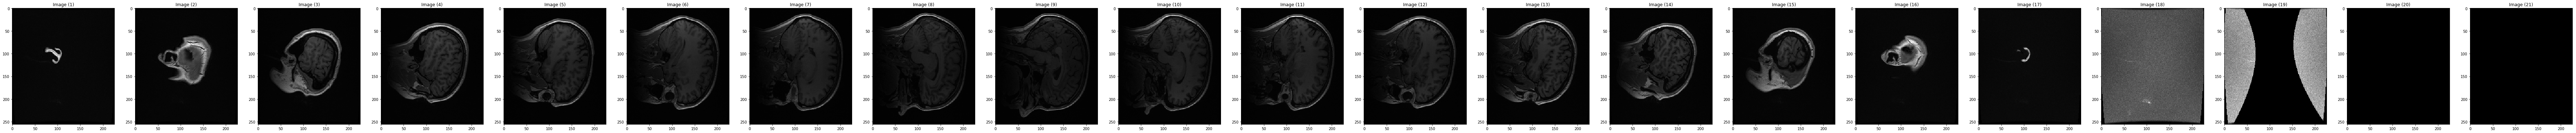

In [9]:
# show t1 scan
show_images(t1_scan[50::10])

#### Normalize

In [0]:
# def norm_slices(self):
#     '''
#     normalizes each slice
#     subtracts mean and div by std dev for each slice
#     clips top and bottom one percent of pixel intensities
#     '''
#     normed_slices = np.zeros((155, 5, 240, 240))
#     for slice_ix in xrange(155):
#         normed_slices[slice_ix][-1] = self.slices_by_slice[slice_ix][-1]
#         for mode_ix in xrange(4):
#             normed_slices[slice_ix][mode_ix] = norm_slice(self.slices_by_slice[slice_ix][mode_ix])
#     return normed_slices

def norm_slice(slice):
    '''
    INPUT:  (1) a single slice of any given modality (excluding gt)
    OUTPUT: normalized slice
    '''
    b, t = np.percentile(slice, (0.5,99.5))
    slice = np.clip(slice, b, t)
    if np.std(slice) == 0:
        return slice
    else:
        return (slice - np.mean(slice)) / np.std(slice)

#### Normalize Output

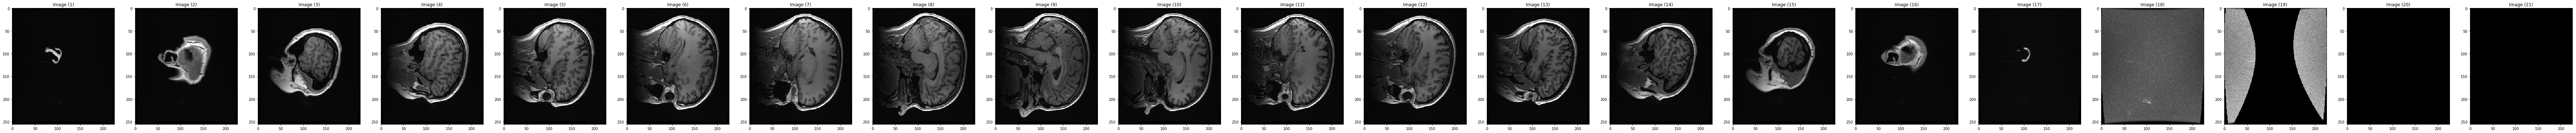

In [11]:
normalized_slice = norm_slice(t1_scan[50::10])
normalized_slice.shape
show_images(normalized_slice)

In [0]:
test_t1 = '/content/drive/My Drive/#6_Brain_Segmentation/Scans/TEST/T1/'
test_t1_np_array = np.zeros((73, 256, 226))

j = 0
for i in range(18, 237, 3):
  image = Image.open(test_t1 + "JH_T1_" + str(i) + ".png")
  test_t1_np_array[j] = norm_slice(np.array(image))
  j += 1
  

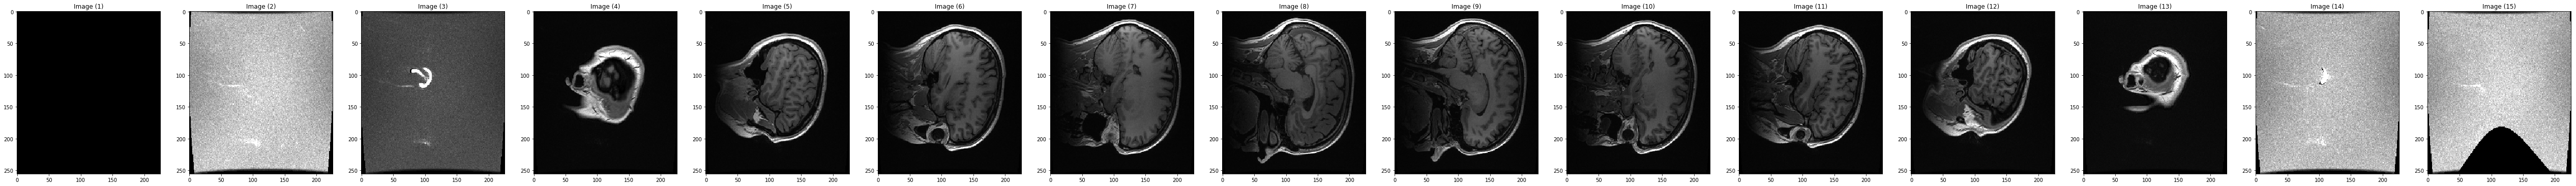

In [33]:
show_images(test_t1_np_array[::5])

In [42]:
test_t1_np_array[40:41]

array([[[-0.77208706, -0.76105331, -0.74560607, ..., -0.78091405,
         -0.7787073 , -0.76546681],
        [-0.76105331, -0.73015882, -0.74339932, ..., -0.74119257,
         -0.76326006, -0.74339932],
        [-0.75001956, -0.74339932, -0.75884656, ..., -0.74560607,
         -0.73236557, -0.72574532],
        ...,
        [-0.89345826, -0.89345826, -0.89345826, ..., -0.89345826,
         -0.89345826, -0.89345826],
        [-0.89345826, -0.89345826, -0.89345826, ..., -0.89345826,
         -0.89345826, -0.89345826],
        [-0.89345826, -0.89345826, -0.89345826, ..., -0.89345826,
         -0.89345826, -0.89345826]]])

In [45]:
np.amin(test_t1_np_array)

-4.267653044708458